In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/DREAM5_PBM_Data_TrainingSet.txt", sep="\t")

In [6]:
df_predict = pd.read_csv("data/DREAM5_PBM_Data_Needed_For_Predictions.txt", sep="\t")

In [9]:
df['length'] = df['Sequence'].apply(len)
df['length'].describe()

df_predict['length'] = df_predict['Sequence'].apply(len)
df_predict['length'].describe()


count    2668248.0
mean          60.0
std            0.0
min           60.0
25%           60.0
50%           60.0
75%           60.0
max           60.0
Name: length, dtype: float64

In [15]:
df.columns

Index(['TF_Id', 'ArrayType', 'Sequence', 'Signal_Mean', 'Background_Mean',
       'Signal_Median', 'Background_Median', 'Signal_Std', 'Background_Std',
       'Flag'],
      dtype='object')

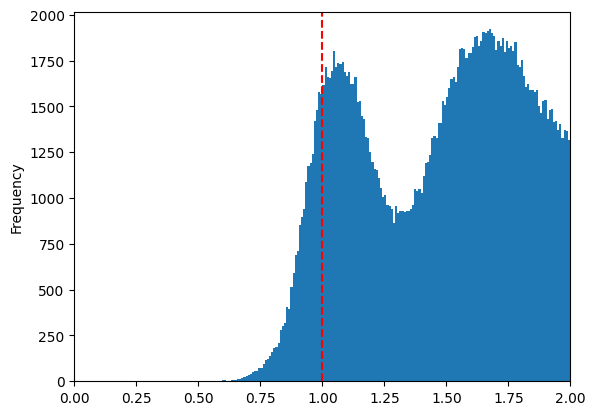

count    1.503025e+06
mean     1.027277e+03
std      9.505502e+02
min      1.804760e+01
25%      3.636540e+02
50%      7.005679e+02
75%      1.408633e+03
max      4.999986e+03
Name: Background_Mean, dtype: float64

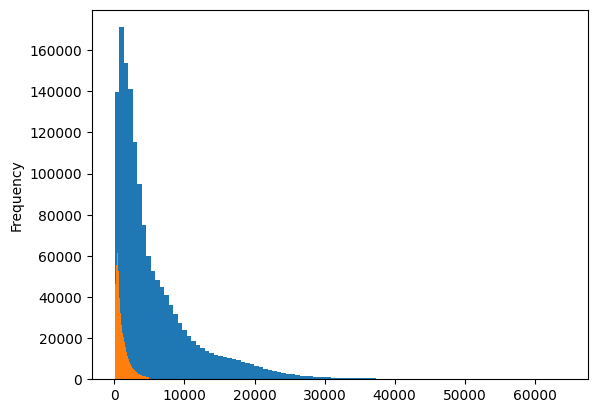

In [2]:
df_new = df[df['Background_Mean'] < 5000]
(df_new['Signal_Mean'] / df_new['Background_Mean']).plot.hist(xlim=(0, 2),bins=10000)
# vertical line at 1
plt.axvline(x=1, color='r', linestyle='--')
plt.show()
df_new['Signal_Mean'].plot.hist(bins=100)
df_new['Background_Mean'].plot.hist(bins=100)
df_new['Signal_Mean'].describe()
df_new['Background_Mean'].describe()

<Axes: ylabel='Frequency'>

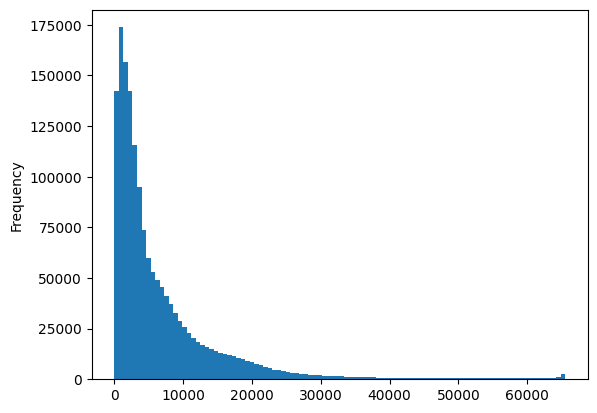

In [33]:
df['Signal_Mean'].plot.hist(bins=100)

In [ ]:
df.drop(df[df['Background_Mean'] > 13000].index, inplace=True)

,TF_Id,ArrayType,Sequence,Signal_Mean,Background_Mean,Signal_Median,Background_Median,Signal_Std,Background_Std,Flag
0,Cebpb,HK,AAAAAACAACAGGAGGGCATCATGGAGCTGTCCAGCCTGTGTGAAA...,1508.7972,264.8014,1557.5,183.0,393.2445,249.7754,0
1,Cebpb,HK,AAAAAACAGCCGGATCACAATTTTGCCGAGAGCGACCTGTGTGAAA...,13630.7324,371.0260,14858.0,245.0,6451.2436,445.4670,0
2,Cebpb,HK,AAAAAACGTCCGGTACACCCCGTTCGGCGGCCCAGCCTGTGTGAAA...,1523.0000,265.7928,1571.5,194.5,439.6682,211.7982,0
3,Cebpb,HK,AAAAAACTCTAGACCTTTAGCCCATCGTTGGCCAACCTGTGTGAAA...,4992.8461,430.4496,5150.0,233.0,1629.2899,507.5433,0
4,Cebpb,HK,AAAAAAGAACAACCGGATAACACCCTTACAGCACACCTGTGTGAAA...,3539.8117,449.4453,3823.5,226.5,1063.9028,551.7675,0
...,...,...,...,...,...,...,...,...,...,...
1584773,Zscan20,ME,TTTTTTGAGGCCCAATCGTTTCGGCCGTGATGCTACCTGTGTGAAA...,5587.8520,1290.7055,5674.0,940.0,1288.4862,919.9467,0
1584774,Zscan20,ME,TTTTTTGTGTACAGTGCTTGAAGACTCGAGGCCGTCCTGTGTGAAA...,6301.7915,978.0584,6732.5,533.5,1426.1166,985.6186,0
1584775,Zscan20,ME,TTTTTTTATCCCCAGCTGTTGGGATTAGGTTTGGGCCTGTGTGAAA...,6641.4511,1139.3701,6912.0,552.5,1027.0229,1329.1318,0
1584776,Zscan20,ME,TTTTTTTGAGCCGTAATCACAGCTGTGCACAGAGCCCTGTGTGAAA...,8889.0000,1497.9172,9130.0,628.0,1540.9114,1766.2420,0


In [32]:
(df['Background_Mean'] > 5000).sum()

np.int64(81753)

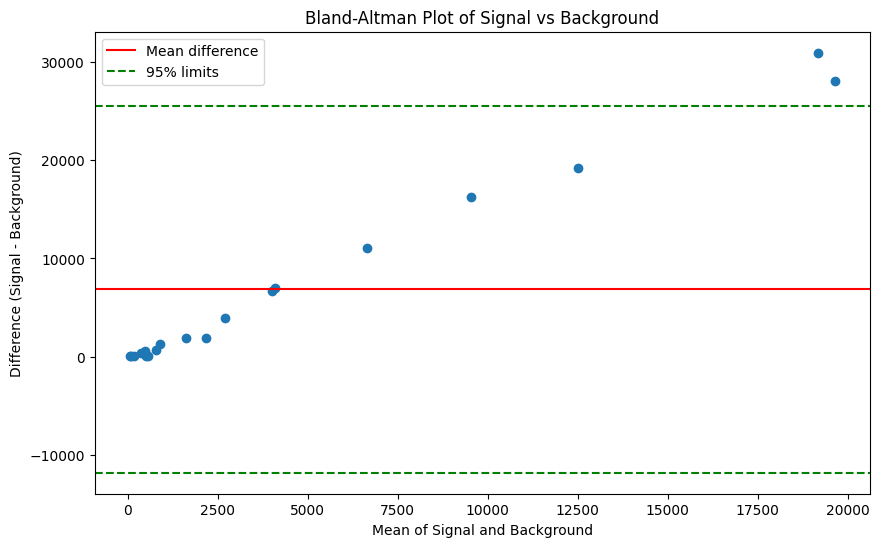

In [23]:
df.groupby("Sequence").agg({"Signal_Mean": "mean", "Background_Mean": "mean"})
# bland-altman plot for sample aggregation
import matplotlib.pyplot as plt
import numpy as np

# Get sample data for first sequence
sample = df[df['Sequence'] == df['Sequence'].iloc[0]]

# Calculate mean and difference between signal and background
mean = (sample['Signal_Mean'] + sample['Background_Mean']) / 2
diff = sample['Signal_Mean'] - sample['Background_Mean']

# Create Bland-Altman plot
plt.figure(figsize=(10,6))
plt.scatter(mean, diff)
plt.axhline(y=np.mean(diff), color='r', linestyle='-', label='Mean difference')
plt.axhline(y=np.mean(diff) + 1.96*np.std(diff), color='g', linestyle='--', label='95% limits')
plt.axhline(y=np.mean(diff) - 1.96*np.std(diff), color='g', linestyle='--')

plt.xlabel('Mean of Signal and Background')
plt.ylabel('Difference (Signal - Background)')
plt.title('Bland-Altman Plot of Signal vs Background')
plt.legend()
plt.show()


<Figure size 1500x1000 with 0 Axes>

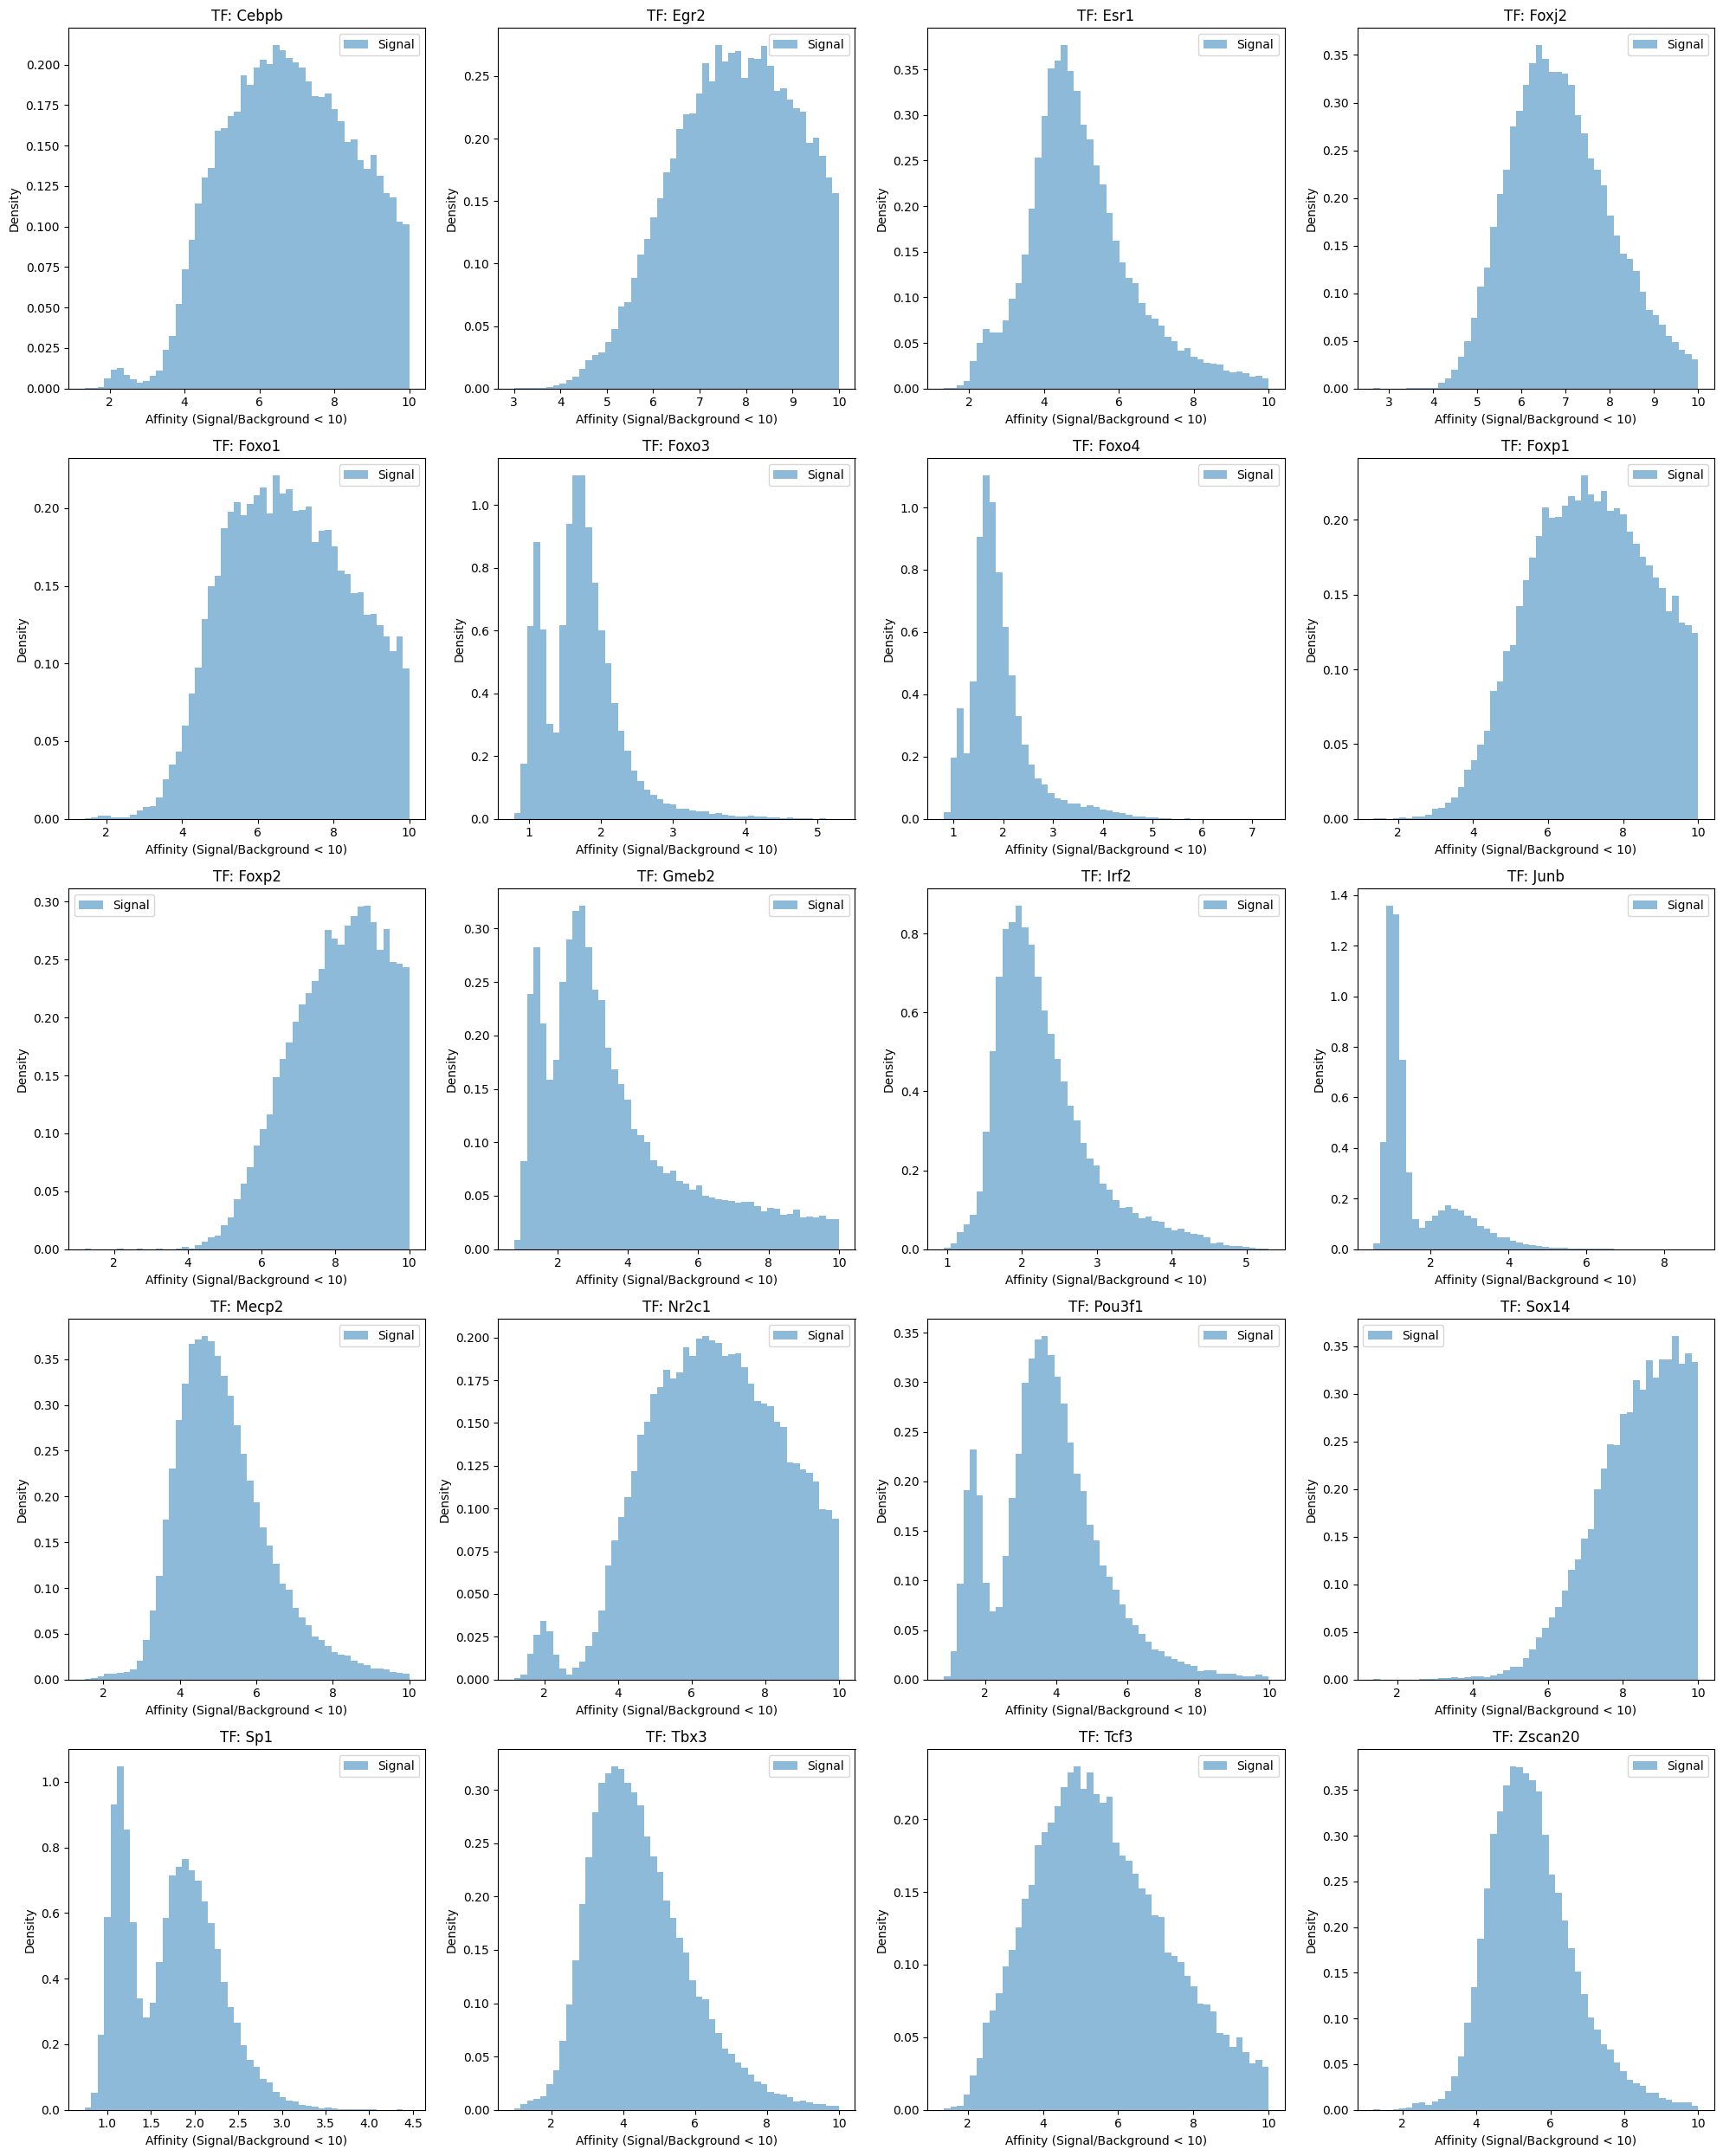

In [6]:
# 为每个转录因子组绘制信号和背景值的分布
import matplotlib.pyplot as plt

# 设置图形大小
plt.figure(figsize=(15, 10))

# 获取所有唯一的转录因子
tfs = df['TF_Id'].unique()

# 创建子图网格
rows = (len(tfs) + 3) // 4  # 每行4个子图
fig, axes = plt.subplots(rows, 4, figsize=(20, 5*rows))
axes = axes.flatten()

# 为每个转录因子绘制分布图
for i, tf in enumerate(tfs):
    tf_data = df[(df['TF_Id'] == tf) & (df['ArrayType'] == 'ME')]
    
    # 计算亲和度比值并筛选小于10的部分
    affinity = tf_data['Signal_Mean']/tf_data['Background_Mean']
    filtered_affinity = affinity[affinity < 10]
    
    # 在同一子图中绘制信号和背景的分布
    axes[i].hist(filtered_affinity, bins=50, alpha=0.5, label='Signal', density=True)
    
    axes[i].set_title(f'TF: {tf}')
    axes[i].legend()
    axes[i].set_xlabel('Affinity (Signal/Background < 10)')
    axes[i].set_ylabel('Density')

# 删除多余的子图
for i in range(len(tfs), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [29]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from tokenizer import SentencePieceTokenizer
from DREAMdataset import load_and_process_data
import os 
from torch.utils.data import DataLoader

cfg = {
    "train_data_path": "data/",
    "train_ratio": 0.7,
    "val_ratio": 0.15
}

train_data_paths = os.listdir(cfg['train_data_path'])
train_data_paths = [os.path.join(cfg['train_data_path'], path) for path in train_data_paths]
train_dataset, val_dataset, test_dataset = load_and_process_data(train_data_paths, train_ratio=0.7, val_ratio=0.15, tokenizer=SentencePieceTokenizer("checkpoints/tokenizer.model"))

In [13]:
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True, collate_fn=train_dataset.collate_fn)

In [28]:
for batch in train_loader:
    print(batch['input_ids'].shape)
    break
    

AttributeError: 'dict' object has no attribute '__dict__'

In [16]:
a

'input_ids'

In [17]:
b

'attention_mask'

In [18]:
c

'labels'